# Date Exploration

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [149]:
dt=pd.read_csv('./Data/GMSC/cs-training.csv',index_col='Index')

In [150]:
dt

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Index,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0


### Tidy Up

In [151]:
dt.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [152]:
# delete all the rows with missing values
dt=dt[-(dt.MonthlyIncome.isnull()|dt.NumberOfDependents.isnull())]
dt.reset_index(drop=True, inplace=True)

In [153]:
# sorted(dt.age.unique())
# 0, 21 - 103
# remove zero
dt=dt[-(dt.age==0)]
dt.reset_index(drop=True, inplace=True)

In [154]:
### group age into decades
dt['age']=np.where((dt['age']>=20) & (dt['age']<30),2,dt['age'])
dt['age']=np.where((dt['age']>=30) & (dt['age']<40),3,dt['age'])
dt['age']=np.where((dt['age']>=40) & (dt['age']<50),4,dt['age'])
dt['age']=np.where((dt['age']>=50) & (dt['age']<60),5,dt['age'])
dt['age']=np.where((dt['age']>=60) & (dt['age']<70),6,dt['age'])
dt['age']=np.where((dt['age']>=70) & (dt['age']<80),7,dt['age'])
dt['age']=np.where(dt['age']>=80,8,dt['age'])

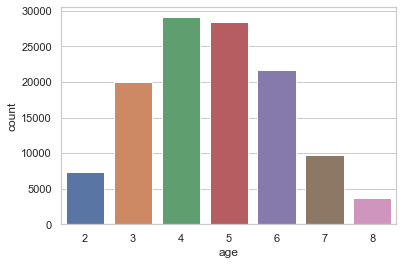

In [155]:
sns.countplot(x='age',data=dt)

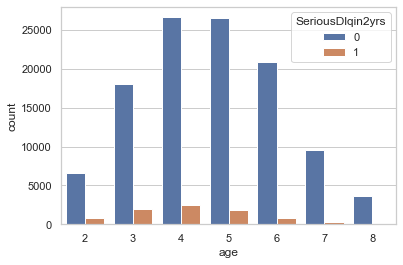

In [156]:
sns.countplot(x='age',data=dt,hue='SeriousDlqin2yrs')

In [158]:
#sns.swarmplot(x='variable',y='value',data=tidy)
box_vars=['NumberOfTime30-59DaysPastDueNotWorse',
                     'NumberOfOpenCreditLinesAndLoans',
                    'NumberOfTimes90DaysLate',
                    'NumberRealEstateLoansOrLines',
                    'NumberOfTime60-89DaysPastDueNotWorse',
                    'NumberOfDependents']
l=len(box_vars)

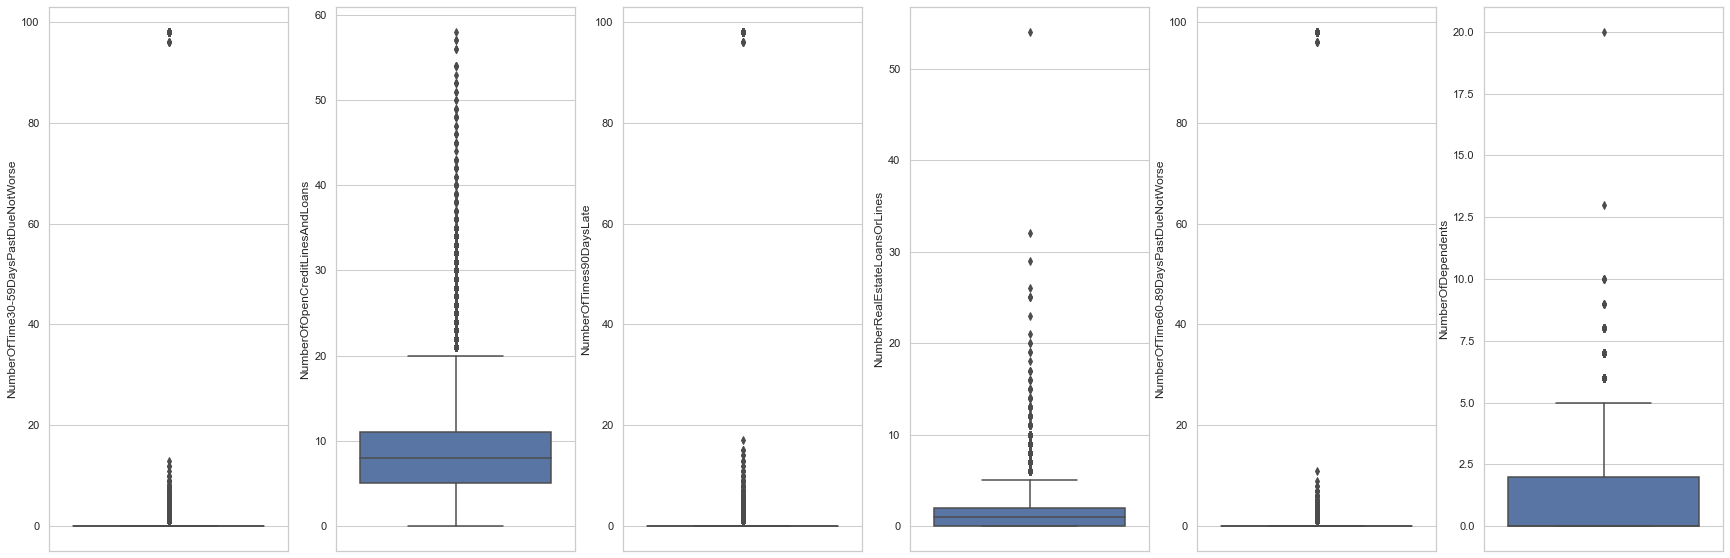

In [159]:
plt.figure(figsize=(30,10))
for i in range(l):
    plt.subplot(1,6,i+1)
    sns.boxplot(y=box_vars[i],data=dt)

Outlier in graph 1, 3, 4, 5, 6

In [160]:
# print(dt['NumberOfTime30-59DaysPastDueNotWorse'].unique())
# print(dt['NumberOfTimes90DaysLate'].unique())
# print(dt['NumberRealEstateLoansOrLines'].unique())
# print(dt['NumberOfTime60-89DaysPastDueNotWorse'].unique())
# print(dt['NumberOfDependents'].unique())
dt=dt[-(dt['NumberOfTime30-59DaysPastDueNotWorse']>=96)]
dt.reset_index(drop=True, inplace=True)

In [161]:
dt.to_csv('Data/data.csv')

### Split Up Data

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
Y = dt['SeriousDlqin2yrs']
X = dt.iloc[:, 1:]

#测试集占比30%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
# print(Y_train)
train = pd.concat([Y_train, X_train], axis=1)
test = pd.concat([Y_test, X_test], axis=1)
clasTest = test.groupby('SeriousDlqin2yrs')['SeriousDlqin2yrs'].count()
train.to_csv('TrainData.csv',index=False)
test.to_csv('TestData.csv',index=False)

### EDA

在建立模型之前，我们一般会对现有的数据进行 探索性数据分析（Exploratory Data Analysis） 。 EDA是指对已有的数据(特别是调查或观察得来的原始数据)在尽量少的先验假定下进行探索。常用的探索性数据分析方法有：直方图、散点图和箱线图等。

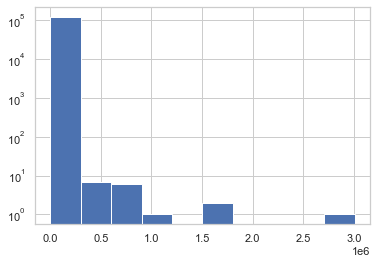

In [178]:
plt.hist(dt.MonthlyIncome,bins=10,log=True)
# some very skewed data 
plt.show()

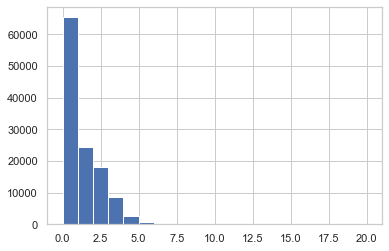

In [182]:
plt.hist(dt.NumberOfDependents,bins=20)
plt.show()